Importing libraries

NumPy: utilized for high-performance vector arithmetic.

Pandas: utilized for dataset management and cleaning.

Matplotlib: utilized for generating graphical visualizations.

Perceptron: a simplt custom built class implementation for the perceptron logic.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.perceptron import Perceptron

For the introduction, I chose a simple dataset suitable for a classification. \
The Iris Species dataset fits these criteria well and is perfect for demonstrating the basics.

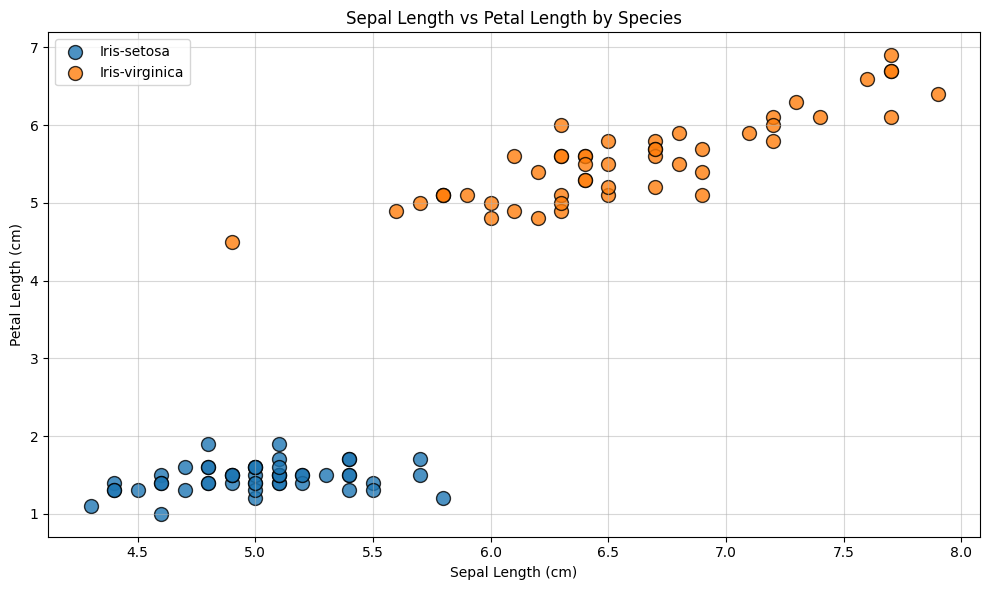

In [2]:
# --- 1. Load Data ---
FILE_PATH = '../datasets/iris_species.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file at {FILE_PATH} was not found.")
    exit()

# --- 2. Data Cleaning ---
# For now, we will only use two iris species for binary classification
df = df[(df['Species'] == 'Iris-setosa') | (df['Species'] == 'Iris-virginica')]


# --- 3. Visualization ---
plt.figure(figsize=(10, 6))

species_groups = df.groupby('Species')

for i, (name, group) in enumerate(species_groups):
    plt.scatter(
        x=group['SepalLengthCm'],
        y=group['PetalLengthCm'],
        label=name,
        edgecolors='black',
        alpha=0.8,
        s=100
    )

plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")

plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Training on 80 samples
Epoch 1/15 - Accuracy: 0.5375
Epoch 2/15 - Accuracy: 0.6500
Epoch 3/15 - Accuracy: 0.8250
Epoch 4/15 - Accuracy: 0.9500
Epoch 5/15 - Accuracy: 0.9750
Epoch 6/15 - Accuracy: 0.9500
Epoch 7/15 - Accuracy: 0.9750
Epoch 8/15 - Accuracy: 0.9750
Epoch 9/15 - Accuracy: 0.9500
Epoch 10/15 - Accuracy: 0.9750
Epoch 11/15 - Accuracy: 1.0000
Epoch 12/15 - Accuracy: 1.0000
Epoch 13/15 - Accuracy: 1.0000
Epoch 14/15 - Accuracy: 1.0000
Epoch 15/15 - Accuracy: 1.0000
Testing on 20 samples

--- Testing Results ---
Accuracy: 100.00%


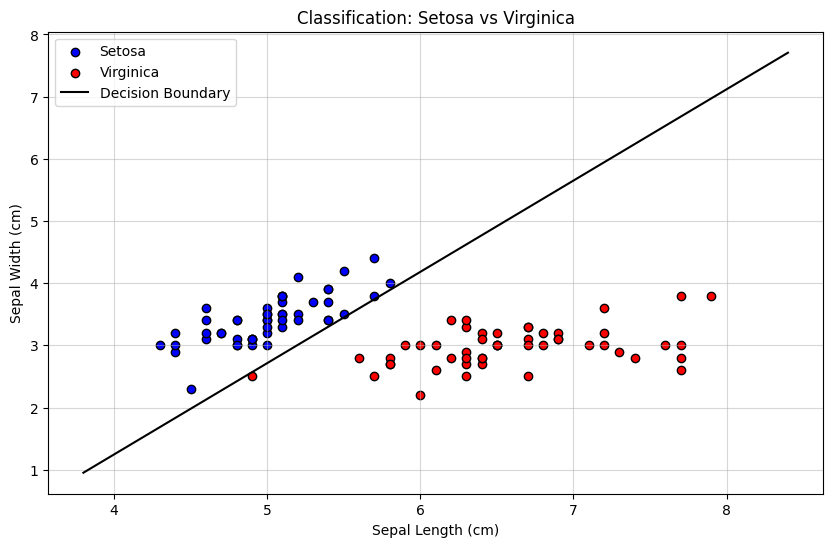

In [112]:
# --- 1. Select Features & Target ---
df_binary = df[df['Species'].isin(['Iris-setosa', 'Iris-virginica'])].copy()

X = df_binary[['SepalLengthCm', 'SepalWidthCm']].values
y = np.where(df_binary['Species'] == 'Iris-setosa', 1, -1)


# --- 2. Split Data for training & testing ---
np.random.seed(50)
shuffled_indices = np.random.permutation(len(X))
split_point = int(len(X) * 0.8)

train_indices = shuffled_indices[:split_point]
test_indices = shuffled_indices[split_point:]

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = Perceptron(n_features=X.shape[1], learning_rate=0.01)
model.fit(X_train, y_train, n_epochs=15, show_progress=True)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test)

accuracy = np.mean(predictions == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


# --- 5. Visualization ---
plt.figure(figsize=(10, 6))

plt.scatter(X[y==1][:, 0], X[y==1][:, 1], color='blue', label='Setosa', edgecolors='k')
plt.scatter(X[y==-1][:, 0], X[y==-1][:, 1], color='red', label='Virginica', edgecolors='k')


x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
x_vals = np.array([x_min, x_max])
w = model.weights

y_vals = -(w[0] * x_vals + w[2]) / w[1]

plt.plot(x_vals, y_vals, 'black', label='Decision Boundary')

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Classification: Setosa vs Virginica')
plt.grid(True, alpha=0.5)
plt.legend()
plt.show()